In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date

#Citation: Zeeshan-ul-hassan Usmani, My Uber Drives Dataset, Kaggle Dataset Repository, March 23, 2017.”

In [55]:
uber_drives = pd.read_csv("My Uber Drives - 2016.csv")

In [3]:
uber_drives.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
uber_drives.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site
1155,Totals,NaN,NaN,NaN,NaN,12204.7,NaN


In [5]:
uber_drives.shape

(1156, 7)

In [6]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [56]:
uber_drives.drop(1155, axis=0, inplace=True)

In [57]:
uber_drives['START_DATE*'] = pd.to_datetime(uber_drives['START_DATE*'], format='%m/%d/%Y %H:%M')
uber_drives['END_DATE*'] = pd.to_datetime(uber_drives['END_DATE*'], format='%m/%d/%Y %H:%M')



uber_drives['total_time'] = uber_drives['END_DATE*'] - uber_drives['START_DATE*']
uber_drives


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,total_time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00
...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00


In [9]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   START_DATE*  1155 non-null   datetime64[ns] 
 1   END_DATE*    1155 non-null   datetime64[ns] 
 2   CATEGORY*    1155 non-null   object         
 3   START*       1155 non-null   object         
 4   STOP*        1155 non-null   object         
 5   MILES*       1155 non-null   float64        
 6   PURPOSE*     653 non-null    object         
 7   total_time   1155 non-null   timedelta64[ns]
dtypes: datetime64[ns](2), float64(1), object(4), timedelta64[ns](1)
memory usage: 72.3+ KB


In [10]:
avg_time = uber_drives['total_time'].mean()
print('Average Time: ', avg_time)

Average Time:  0 days 00:23:14.597402597


In [22]:
# Drops the Totals row from the dataset
uber_drives = uber_drives.drop(uber_drives[uber_drives['START_DATE*'] == 'Totals'].index)

# convert the start_date and end_date columns to datetime objects
uber_drives['START_DATE*'] = pd.to_datetime(uber_drives['START_DATE*'], format='%m/%d/%Y %H:%M')
uber_drives['END_DATE*'] = pd.to_datetime(uber_drives['END_DATE*'], format='%m/%d/%Y %H:%M')

# set the start_date column as the index of the DataFrame
uber_drives.set_index('START_DATE*', inplace=True)

# resample the DataFrame using a weekly frequency and count the number of rides per week
weekly_rides = uber_drives.resample('W')['END_DATE*'].count()

# calculate the average number of rides per week
avg_rides_per_week = weekly_rides.mean()

# print the result
print('Average number of rides per week:', avg_rides_per_week)

Average number of rides per week: 21.79245283018868


In [12]:
uber_drives.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1155 entries, 2016-01-01 21:11:00 to 2016-12-31 22:08:00
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype          
---  ------      --------------  -----          
 0   END_DATE*   1155 non-null   datetime64[ns] 
 1   CATEGORY*   1155 non-null   object         
 2   START*      1155 non-null   object         
 3   STOP*       1155 non-null   object         
 4   MILES*      1155 non-null   float64        
 5   PURPOSE*    653 non-null    object         
 6   total_time  1155 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(1), object(4), timedelta64[ns](1)
memory usage: 72.2+ KB


In [19]:
# group the rides by month
rides_by_month = uber_drives.groupby(pd.Grouper(key='END_DATE*', freq='M'))

# count the number of rides in each month
rides_count_by_month = rides_by_month.size()

# calculate the average number of rides per month
average_rides_per_month = rides_count_by_month.mean()

print("Average number of rides per month:", average_rides_per_month)

Average number of rides per month: 96.25


In [15]:
#Checks columns name of the dataframe
print(uber_drives.columns)

Index(['END_DATE*', 'CATEGORY*', 'START*', 'STOP*', 'MILES*', 'PURPOSE*',
       'total_time'],
      dtype='object')


In [42]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   START_DATE*  1155 non-null   datetime64[ns]
 1   END_DATE*    1155 non-null   object        
 2   CATEGORY*    1155 non-null   object        
 3   START*       1155 non-null   object        
 4   STOP*        1155 non-null   object        
 5   MILES*       1155 non-null   float64       
 6   PURPOSE*     653 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 63.3+ KB


In [63]:
#Makes a seperate column showing the day of the week for the ride
uber_drives['dayofweek'] = uber_drives['START_DATE*'].dt.dayofweek

#Counts the occurrence of each dayofweek, from highest occurrence to lowest
uber_drives['dayofweek'].value_counts()

#Thursday is the day with most rides

4    206
1    176
0    174
3    154
5    150
6    148
2    147
Name: dayofweek, dtype: int64

In [65]:
uber_drives.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,total_time,dayofweek
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,0 days 00:06:00,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,0 days 00:12:00,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,0 days 00:13:00,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,0 days 00:14:00,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,0 days 01:07:00,2


In [66]:
uber_drives.tail()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*,total_time,dayofweek
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,0 days 00:07:00,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,0 days 00:18:00,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,0 days 00:35:00,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,0 days 00:18:00,5
1154,2016-12-31 22:08:00,2016-12-31 23:51:00,Business,Gampaha,Ilukwatta,48.2,Temporary Site,0 days 01:43:00,5


In [64]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   START_DATE*  1155 non-null   datetime64[ns] 
 1   END_DATE*    1155 non-null   datetime64[ns] 
 2   CATEGORY*    1155 non-null   object         
 3   START*       1155 non-null   object         
 4   STOP*        1155 non-null   object         
 5   MILES*       1155 non-null   float64        
 6   PURPOSE*     653 non-null    object         
 7   total_time   1155 non-null   timedelta64[ns]
 8   dayofweek    1155 non-null   int64          
dtypes: datetime64[ns](2), float64(1), int64(1), object(4), timedelta64[ns](1)
memory usage: 81.3+ KB


In [68]:
#Makes an hour column in dataframe using startdate as datetime64 dtype
uber_drives['hour'] = uber_drives['START_DATE*'].dt.hour

#Counts the occurrences of each hour in the dataframe
uber_drives['hour'].value_counts()

#Hour 15 or 3pm is the hour of the day with the highest number of rides

15    98
17    95
13    94
18    94
14    89
16    88
12    77
11    72
20    71
19    68
10    65
9     51
21    51
8     35
22    31
23    26
0     19
7     13
1      5
5      4
6      4
3      3
2      2
Name: hour, dtype: int64

In [73]:
#Calculates the average distance of rides
avg_distance = uber_drives['MILES*'].mean()
print("Average distance per ride:", avg_distance)

Average distance per ride: 10.566839826839812


In [81]:
uber_drives.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   START_DATE*  1155 non-null   datetime64[ns] 
 1   END_DATE*    1155 non-null   datetime64[ns] 
 2   CATEGORY*    1155 non-null   object         
 3   START*       1155 non-null   object         
 4   STOP*        1155 non-null   object         
 5   MILES*       1155 non-null   float64        
 6   PURPOSE*     653 non-null    object         
 7   total_time   1155 non-null   timedelta64[ns]
 8   dayofweek    1155 non-null   int64          
 9   hour         1155 non-null   int64          
 10  time         1155 non-null   object         
dtypes: datetime64[ns](2), float64(1), int64(2), object(5), timedelta64[ns](1)
memory usage: 99.4+ KB


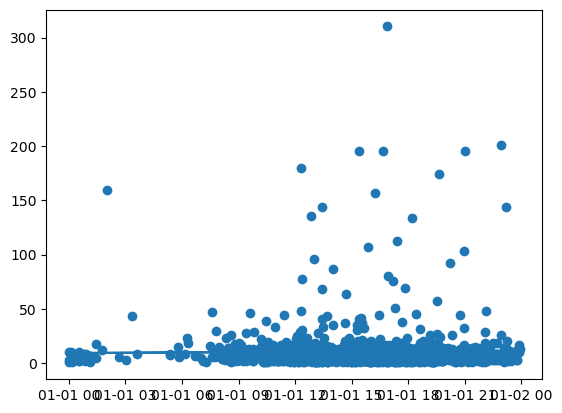

In [88]:
uber_drives['time'] = pd.to_datetime(uber_drives['time'], format='%H:%M:%S')
x = uber_drives['time']
y = uber_drives['MILES*']
plt.scatter(x,y)

x = np.array(uber_drives['time'].map(pd.Timestamp.timestamp)) # convert datetime to timestamp in seconds
y = np.array(uber_drives['MILES*'])
m, b = np.polyfit(x, y, 1)

# add linear regression line to scatterplot 
plt.plot(uber_drives['time'], m*x+b)

# show the plot
plt.show()

#no correlation between miles of ride and start time

In [90]:
uber_drives['PURPOSE*'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE*, dtype: int64

In [92]:
#Variable that holds the sum of each unique miles in each purpose category
df_new = uber_drives.groupby('PURPOSE*')['MILES*'].sum()
print(df_new)

#Based on the total miles driven for each purpose, meetings has the highest total amount of miles driven for every ride hence highest average fare

PURPOSE*
Airport/Travel       16.5
Between Offices     197.0
Charity ($)          15.1
Commute             180.2
Customer Visit     2089.5
Errand/Supplies     508.0
Meal/Entertain      911.7
Meeting            2851.3
Moving               18.2
Temporary Site      523.7
Name: MILES*, dtype: float64
